Looking twice into data: Digging into the NYT teaser about college attendance versus parent income 

In [1]:
import numpy as np

In [13]:
import matplotlib.pyplot as plt
import matplotlib as mp

In [16]:
mp.style.use('seaborn-poster')

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('college_by_income.csv')

In [5]:
df

,par_bin,bin_n,par_fam_inc,par_inc_log,kid_fam_rank,kid_fam_bin,kid_fam_inc,kidzero,kid_inc_log,kid_inc_log_z,kid_inc_log_z1000,college,kid_teenbirth_givenf,coll_qual_20_rank
0,1,98677,1700,7.1758,0.29595,30.112301,22100,0.17706,9.5861,7.8889,2.26028,0.24618,0.29486,0.34407
1,2,98677,4100,8.3197,0.31201,31.717300,23900,0.15601,9.6480,8.1429,2.36472,0.26061,0.30482,0.34804
2,3,98678,6100,8.7088,0.32124,32.638401,24400,0.14299,9.6837,8.2991,2.42937,0.27095,0.30227,0.35059
3,4,98677,7700,8.9525,0.33137,33.650398,25500,0.13309,9.7253,8.4310,2.48817,0.28197,0.30502,0.35491
4,5,98677,9200,9.1269,0.33784,34.296299,26400,0.12722,9.7513,8.5107,2.52747,0.28843,0.30301,0.35596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,98677,215800,12.2814,0.65346,65.847801,78800,0.03525,10.8860,10.5024,3.85149,0.91392,0.02852,0.73454
96,97,98677,248200,12.4210,0.65781,66.282700,82400,0.03659,10.9117,10.5124,3.86935,0.91963,0.02616,0.74580
97,98,98678,303200,12.6198,0.66127,66.629402,85400,0.03768,10.9287,10.5170,3.88249,0.92730,0.02304,0.75945
98,99,98677,420100,12.9405,0.66726,67.227097,91900,0.03938,10.9634,10.5317,3.90875,0.93384,0.02020,0.77302


### the share of children that attend college between the ages of 18 and 21 is linearly related to their parent's income percentile

Friday's NYT newsletter featured a link to to a data viz in which readers where asked to guess how likley it is for children of 'poor' and 'rich' families to go to college. In particular, the reader was asked to draw their best guess into a plot with the share of children that go to college on the y-axis (a number between 0 and 1) and the percentile into which the parent's income falls on the x-axis.  
You can try it out here to see how good your best guess is:
https://www.nytimes.com/interactive/2015/05/28/upshot/you-draw-it-how-family-income-affects-childrens-college-chances.html?campaign_id=9&emc=edit_nn_20210514&instance_id=30809&nl=the-morning&regi_id=119956320&segment_id=58039&te=1&user_id=7bfb48191e644dd8f497d044991861fb

The correct curve looks like this:

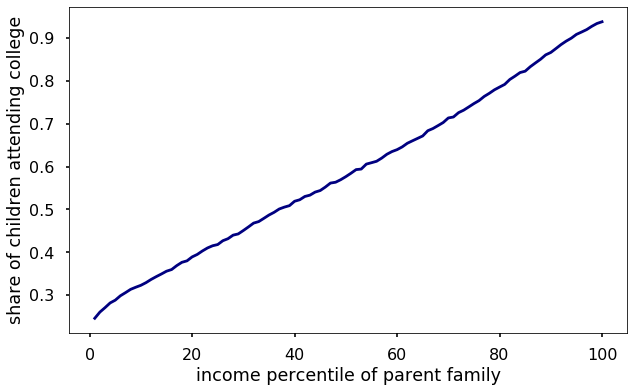

In [472]:
plt.figure(figsize=(10,6))
#plt.title('college attendance by parents income percentile')
plt.plot(df['par_bin'], df['college'], label='data',color='navy')
plt.ylabel('share of children attending college')
plt.xlabel('income percentile of parent family')
plt.savefig('college_versus_percentile.png', bboxinches='tight')

It is more or less a straight line, suggesting a linear relationship between the parent's income percentile and the probability of their children attending college. The NYT claims (and this is why they have you draw that line) that this is surprising to many people. I also drew the line somewhat wrong, but then quickly realized that it was because income percentile was not the metric I was thinking in when thinking about people's income. What I and probably most people have in mind when they read the words 'rich' and 'poor' is the actual income.

So which x-axis is more illuminating: the actual income or the income percentile? (definition of percentile: a family in the 10th percentile of the data sample has a lower income than 90% of families in that sample and a higher income than 9% of families in that sample.) 

Using the percentile on the x-axis makes sense because it allows you to make quantitative statements about the population. We can see with a glimpse, for example, that children from 50% of all families have a chance of less than 55% to attend college. This metric also has the nice property that the area under the curve gives us an estimate of the total share of children that attend college (assuming the number of children is not too dependent on income). In this case we get (in %)

In [453]:
tot_share = np.trapz(x=df['par_bin'], y =df['college'])
print(tot_share)

58.342009842


However, one could also argue that this is not the relevant number for determining whether a young person can attend college or not, but that the relevant number is the actual income of their parents and how it compares to the costs of higher education. To understand why the above curve is more or less a straight line, including at the higher income percentiles (where one would expect it to flatten out), the crucial bit of information missing here is the relationship between income precentile and actual income.

To illustrate this let's make a few guesses for possible income distributions, that is the parent's household income in each percentile. 

In [473]:
def percentile_to_income_1(x):
    return np.exp((x-100)/20)*max(df['par_fam_inc'])

def percentile_to_income_2(x):
    return max(df['par_fam_inc'])/100*x

def percentile_to_income_3(x):
    return np.log(x)/np.log(100)*max(df['par_fam_inc'])

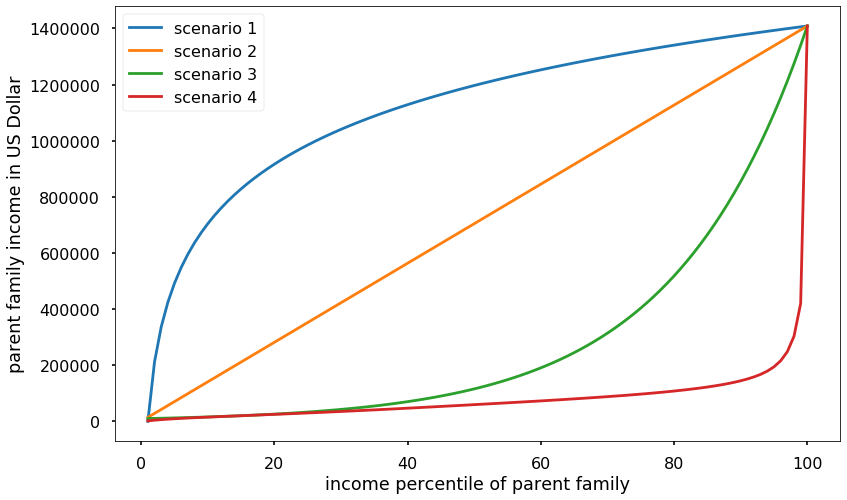

In [507]:
plt.figure(figsize=(13,8))
plt.plot(df['par_bin'], percentile_to_income_3(df['par_bin']), label='scenario 1')
plt.plot(df['par_bin'], percentile_to_income_2(df['par_bin']), label='scenario 2')
plt.plot(df['par_bin'], percentile_to_income_1(df['par_bin']), label='scenario 3')
plt.plot(df['par_bin'], df['par_fam_inc'],label='scenario 4')

plt.ylabel('parent family income in US Dollar')
plt.xlabel('income percentile of parent family')
plt.legend()
plt.savefig('income_distributon_scenarios.png', bboxinches='tight')
plt.show()

Notice something? Right! The different scenarios have different total amounts of money floating around (area under the curve), but before we normalize them to a common value, let's take a minute to understand them. 
Scenario 1 has very few people with low incomes, and many people with higher incomes. There is no big difference in income between the 50th percentile and the 90th percentile, meaning that the top 50% of earners basically make very similar amounts of money. (This curve is roughly logarithmic)
Scenario 2 is a linear relationship. In this scenario the income difference between the 20th and 30th percentile is the same as between the the 80th and the 90th.
In Scenario 3 the difference of incomes between neighboring percentiles increases with the percentile. This means the jump in income from the 20th to the 21st percentile is much smaller than the jump from the 90 to the 91st. (This curve is roughly exponential)
Scenario 4 is a blend between a linear relationship at perecntiles<75 and an exponential relationship at percentiles>75%, meaning that the upper few percent of earners make much more money than the lower 90something percent of earners.

One of these 'scenarios' is the true distribution (for this dataset) and you can probably already guess which one it is.

Ok, to be more realistic, let's normalize them all to a common areu under the curve.

In [508]:
norm_target = np.trapz(x=df['par_bin'], y =df['par_fam_inc'])
norm4 = np.trapz(x=df['par_bin'], y =df['par_fam_inc'])
norm1 = np.trapz(x=df['par_bin'], y=percentile_to_income_1(df['par_bin']))
norm2 = np.trapz(x=df['par_bin'], y=percentile_to_income_2(df['par_bin']))
norm3 = np.trapz(x=df['par_bin'], y=percentile_to_income_3(df['par_bin']))

In [509]:
def percentile_to_income_1_normed(x):
    return percentile_to_income_1(x)*norm_target/norm1

def percentile_to_income_2_normed(x):
    return percentile_to_income_2(x)*norm_target/norm2

def percentile_to_income_3_normed(x):
    return percentile_to_income_3(x)*norm_target/norm3

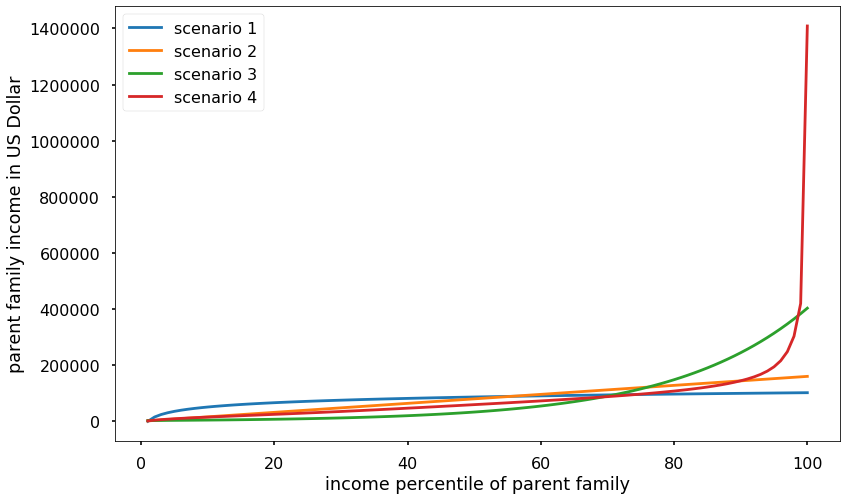

In [515]:
plt.figure(figsize=(13,8))
plt.plot(df['par_bin'], percentile_to_income_3_normed(df['par_bin']), label='scenario 1')
plt.plot(df['par_bin'], percentile_to_income_2_normed(df['par_bin']), label='scenario 2')
plt.plot(df['par_bin'], percentile_to_income_1_normed(df['par_bin']), label='scenario 3')
plt.plot(df['par_bin'], df['par_fam_inc']/norm4*norm_target,label='scenario 4')

plt.ylabel('parent family income in US Dollar')
plt.xlabel('income percentile of parent family')
plt.legend()
plt.savefig('income_distributon_scenarios_normed.png', bboxinches='tight')

Notice that because the total amount of money is now conserved, teh income of the highest income earners is quite different from scenario to scenario.
If we don't want this to mess up the scaling of our plot, we can plot the parent family income as a fraction of maximum family income in each scenario, that is divide each curve by its value at the 100th percentile.

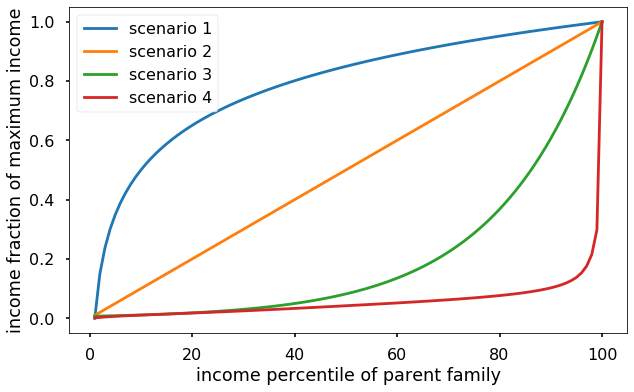

In [479]:
plt.figure(figsize=(10,6))
plt.plot(df['par_bin'], percentile_to_income_3_normed(df['par_bin'])/percentile_to_income_3_normed(df['par_bin'])[99], label='scenario 1')
plt.plot(df['par_bin'], percentile_to_income_2_normed(df['par_bin'])/percentile_to_income_2_normed(df['par_bin'])[99], label='scenario 2')
plt.plot(df['par_bin'], percentile_to_income_1_normed(df['par_bin'])/percentile_to_income_1_normed(df['par_bin'])[99], label='scenario 3')
plt.plot(df['par_bin'], df['par_fam_inc']/df['par_fam_inc'][99],label='scenario 4')
                                                                             

plt.ylabel('income fraction of maximum income')
plt.xlabel('income percentile of parent family')
plt.legend()
plt.savefig('income_distributon_scenarios_normed_frac.png', bboxinches='tight')

and with this we are back at the shapes we had before...

Assuming these scenarios we can now translate our first plot that is based on the real data, the probability of going to college as a function of parent's income percentile to a plot showing the probability of going to college as a function of parent's actual income.

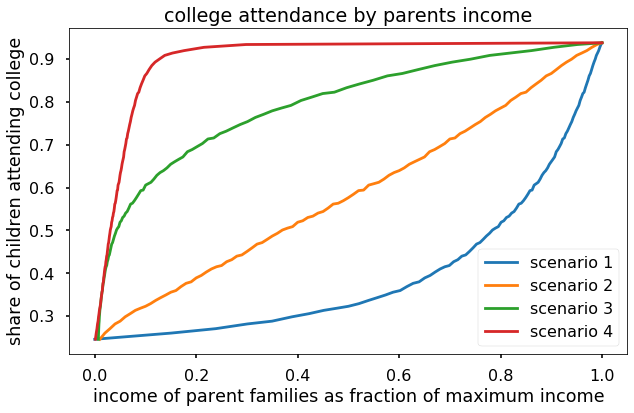

In [483]:
plt.figure(figsize=(10,6))
plt.title('college attendance by parents income')
plt.plot(percentile_to_income_3_normed(df['par_bin'])/percentile_to_income_3_normed(df['par_bin'])[99], df['college'], label='scenario 1')
plt.plot(percentile_to_income_2_normed(df['par_bin'])/percentile_to_income_2_normed(df['par_bin'])[99], df['college'], label='scenario 2')
plt.plot(percentile_to_income_1_normed(df['par_bin'])/percentile_to_income_1_normed(df['par_bin'])[99], df['college'], label='scenario 3')
plt.plot(df['par_fam_inc']/df['par_fam_inc'][99], df['college'], label='scenario 4')

#plt.plot(df['par_fam_inc'], df['college']*100, label='data')
plt.ylabel('share of children attending college')
plt.xlabel('income of parent families as fraction of maximum income')
plt.savefig('college_versus_income_bin.png', bboxinches='tight')
#plt.xlim(0, 400000)
plt.legend()

We end up with a somewhat mirrow image of our income distributions. Now I want to point out scenario 4. Here, we have reached 90% college attendance rate at about 10% of the maximum income value. This is good, right? 
Well, here we have created a classic example for how you can sugarcoat an inconvenient truth by choosing your metrics wisely. 
If we plot the same curve against the actual income value instead, the truth comes to light:


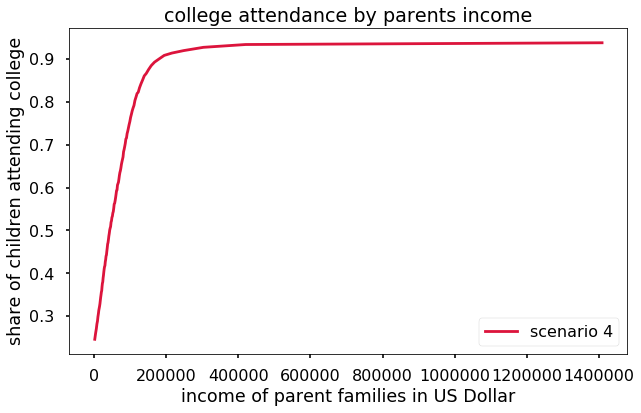

In [484]:
plt.figure(figsize=(10,6))
plt.title('college attendance by parents income')
plt.plot(df['par_fam_inc'], df['college'], label='scenario 4', color='crimson')

#plt.plot(df['par_fam_inc'], df['college']*100, label='data')
plt.ylabel('share of children attending college')
plt.xlabel('income of parent families in US Dollar')
plt.savefig('college_versus_income_scenario4.png', bboxinches='tight')
#plt.xlim(0, 400000)
plt.legend()

we see that this 90% is reached at a household income of almost $200 000, which is much more than the average American makes. 

Plotting all of our scenarios against actual income, we get

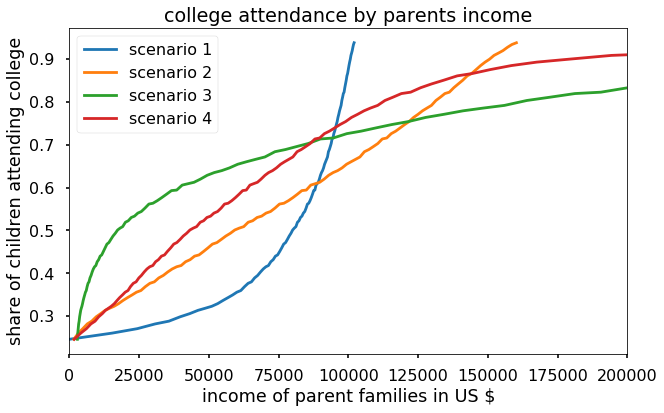

In [488]:
plt.figure(figsize=(10,6))
plt.title('college attendance by parents income')
plt.plot(percentile_to_income_3_normed(df['par_bin']), df['college'], label='scenario 1')
plt.plot(percentile_to_income_2_normed(df['par_bin']), df['college'], label='scenario 2')
plt.plot(percentile_to_income_1_normed(df['par_bin']), df['college'], label='scenario 3')
plt.plot(df['par_fam_inc'], df['college'],label='scenario 4')
#plt.plot(df['par_fam_inc'], df['college']*100, label='data')
plt.ylabel('share of children attending college')
plt.xlabel('income of parent families in US $')
plt.savefig('college_versus_income_all.png', bboxinches='tight')
plt.xlim(0,200000)
plt.legend()

Showing that in the other scenarios we achieve 90% college attendance at much lower incomes. This illustrates that to fully grasp the plot we started with, the probability of going to college as a function of parents income percentile, we need a second crucial piece of information, which is the income distribution telling us how percentile relates to actual income.
Having this insight established, let's move on and see if we can do some further analysis.

So far we have kept the relationship between income percentile and college attendance fixed. This is, as we argued above unrealistic, if we assume that the probability of going to college depends on the actual income in US Dollars and how it compares to the costs of a college education.

If we fix the relationship between actual income in US Dollar and college attendance instead, we can derive how many more children would be able to attend college in our alternative income distribution scenarios. (Making the assumption that the costs for higher educations are independent from the income distribution).

In [463]:
from scipy.interpolate import interp1d

In [464]:
def income_to_percentile_1(y):
    return np.log(y/max(df['par_fam_inc'])*norm1/norm_target)*20+100

def income_to_percentile_2(y):
    return y/max(df['par_fam_inc'])*100*norm2/norm_target

def income_to_percentile_3(y):
    return np.exp(y/max(df['par_fam_inc'])*norm3/norm_target*np.log(100))

f = interp1d(x=df['par_fam_inc'], y=df['par_bin'])

def income_to_percentile_4(y):
    return f(y)

Let's plot the fraction of college attendance as a function of percentile under this new model: 

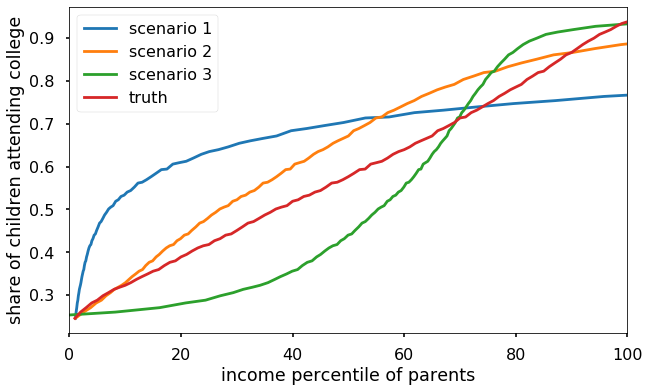

In [492]:
plt.figure(figsize=(10,6))
plt.plot(income_to_percentile_3(df['par_fam_inc']), df['college'], label='scenario 1')
plt.plot(income_to_percentile_2(df['par_fam_inc']), df['college'], label='scenario 2')
plt.plot(income_to_percentile_1(df['par_fam_inc']), df['college'], label='scenario 3')
plt.plot(df['par_bin'], df['college'],label='truth')
#plt.plot(df['par_fam_inc'], df['college']*100, label='data')
plt.ylabel('share of children attending college')
plt.xlabel('income percentile of parents')

plt.xlim(0,100)
plt.legend()
plt.savefig('college_versus_income_percentile.png', bboxinches='tight')

In the red line we reckognize the real data we started with. Scenario 4 is therefore the truth: The income to percentile relationship in this data sample is linear except in the highest income bins, where it becomes exponential. A family in the highest income percentile of this dataset makes on average 1.4 Million US Dollars, while a family in the second to last income bin makes less than a third of this amount. A family in the 90th percentile makes on average $ 150 000 Dollar. This explains wile the college attendance rate still depends linearly on the incoem percentile even at high income percentiles. 

We already established that the total fraction of children attending college in the real data sample is 0.58. We can now compute the fraction in our other income distribution scenarios (under our model): 

In [466]:
percentile_model1= income_to_percentile_1(df['par_fam_inc'])
percentile_model2= income_to_percentile_2(df['par_fam_inc'])
percentile_model3= income_to_percentile_3(df['par_fam_inc'])
percentile_model4= income_to_percentile_4(df['par_fam_inc'])

Scenario 3: 

In [467]:
np.trapz(df['college'][np.where(percentile_model1<=100)[0]],percentile_model1[np.where(percentile_model1<=100)[0]]/100)

0.5009665691693941

Scenario 2: 

In [468]:
np.trapz(df['college'][np.where(percentile_model2<=100)[0]],percentile_model2[np.where(percentile_model2<=100)[0]]/100)

0.6252035683423748

Scenario 1:

In [469]:
np.trapz(df['college'][np.where(percentile_model3<=100)[0]],percentile_model3[np.where(percentile_model3<=100)[0]]/100)

0.6348518094154293

It turns out that scenario 3, even though it appears to have more high income families actually results in less childrena ttending college, because it overproportionally looses children at lower incomes. And even our flattest income distribution scenario only improves college attendance by 4-5%. 
Why is that? 
If you go back to plot ... you see that the probability of going to coellege at low to medium income svery steeply increases with income. In order to push college attendance above 60% one would need to to bring a majority of families over an income level of at least 60 000! Or... lower the costs of higher education :)


I hope you enjoyed this little data jam session!

The data used in this article is public and was downloaded from https://opportunityinsights.org/. Link to data: https://opportunityinsights.org/wp-content/uploads/2018/04/Statistics_By_Parent_or_child_Income_Percentile.xlsx
It was initially compiled and used for the paper "Where is the Land of Opportunity? The Geography of Intergenerational Mobility in the United States" by  Raj Chetty, Nathaniel Hendren, Patrick Kline & Emmanuel Saez (https://www.nber.org/papers/w19843)